# Publication Figures

Produce figures included in the publication.

In [1]:
import cartopy
import importnb
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import numpy as np
import pandas as pd
import xarray as xr

from configure import read_stored_variable
from src import utilities, plotting

Import notebooks which contain functionalized plots.

In [ ]:
with importnb.Notebook(include_non_defs=False):
    import nb2_doppler_shift_adjustment
    import nb3_overview
    import nb4_spectra
    import nb5_slope_primary_dependence
    import nb6_slope_secondary_dependence
    import nb7_slope_alignment
    import nb8_slope_spatial

## Setup

In [5]:
%%capture
%run 'nb8-slope-spatial.ipynb'
%run -i configure.py

In [6]:
microswift_df = read_stored_variable('microswift_df')
spotter_df = read_stored_variable('spotter_df')
fit_df = read_stored_variable('fit_df')
fit_by_category_df = read_stored_variable('fit_by_category_df')
crossing_mss_ratio_bins = read_stored_variable('crossing_mss_ratio_bins')
aligned_mss_ratio_bins = read_stored_variable('aligned_mss_ratio_bins')
coamps_ds = read_stored_variable('coamps_ds')
coamps_xy_ds = read_stored_variable('coamps_xy_ds')
ibtracs_df = read_stored_variable('ibtracs_df')
idalia_nhc_geometry = read_stored_variable('idalia_nhc_geometry')
spotter_spectra_2d = read_stored_variable('spotter_spectra_2d')
time_slice = read_stored_variable('time_slice')
time_slice_no_tz = read_stored_variable('time_slice_no_tz')

plotting.configure_figures()

## Idalia drifter map

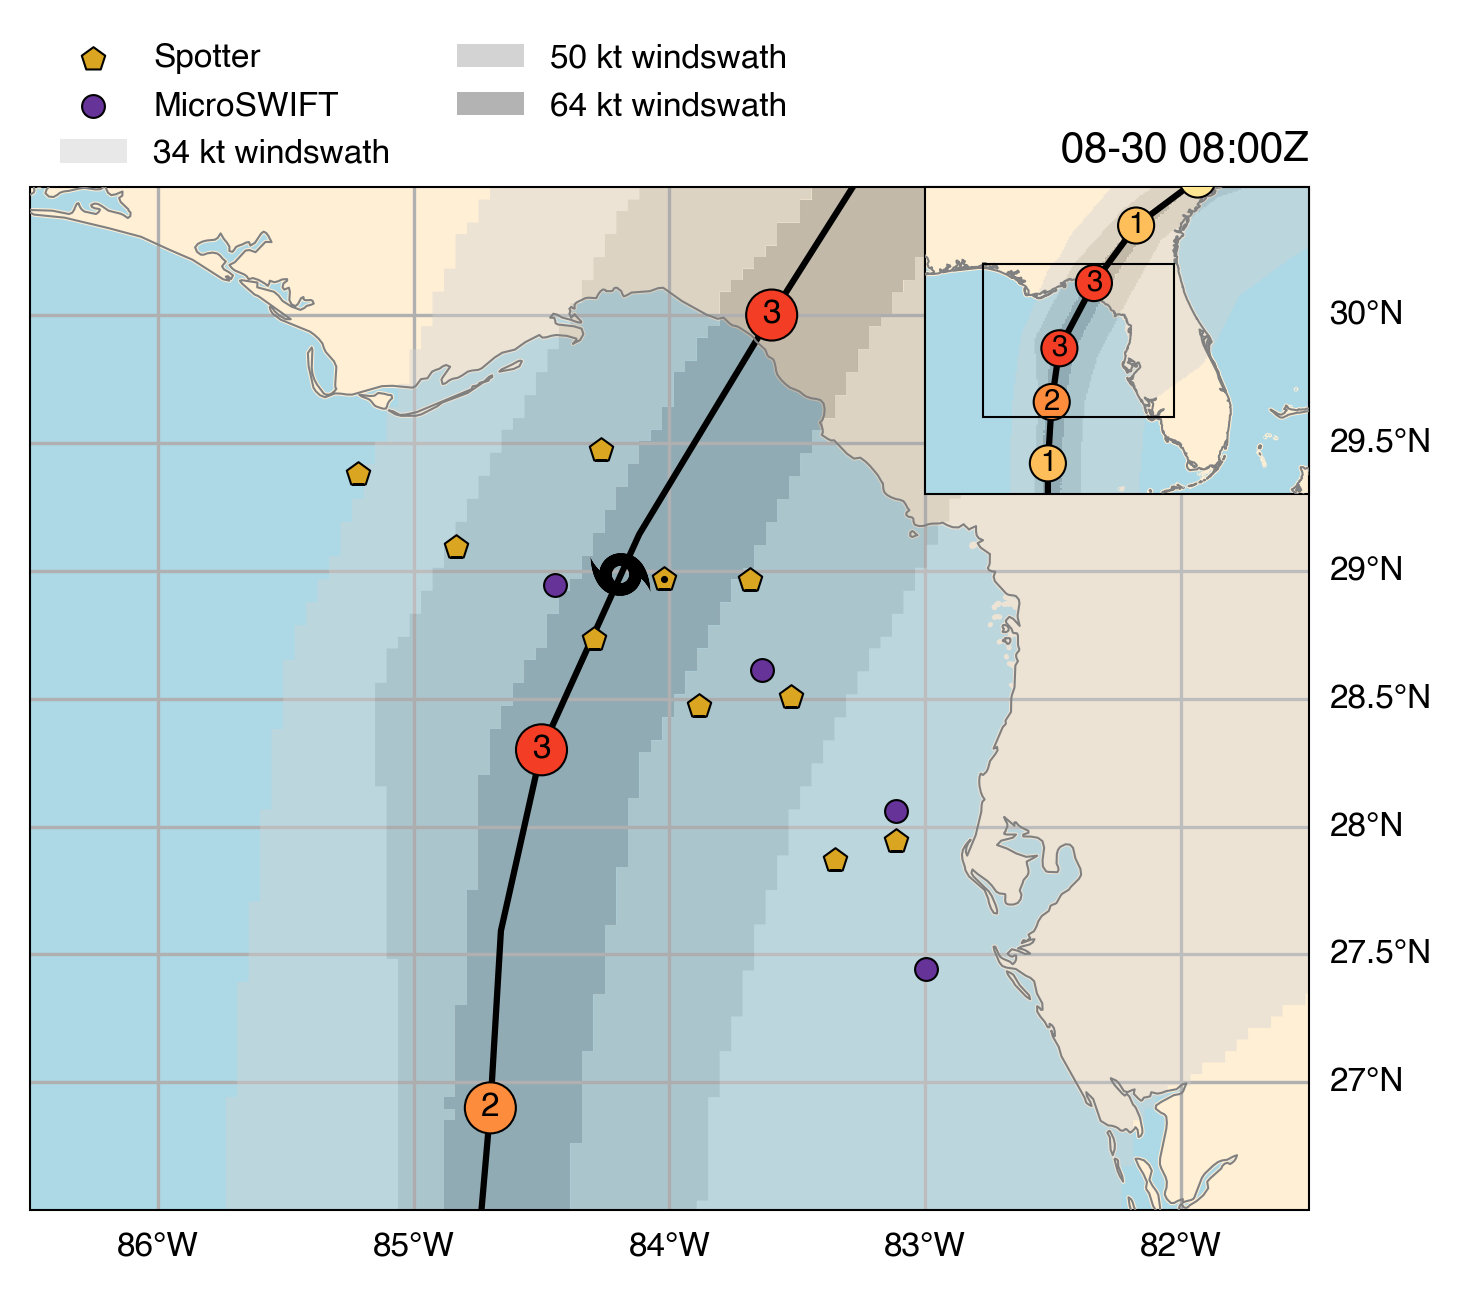

In [21]:
FIG_TITLE = (f"fig-idalia_drifter_map")
FIG_SIZE = (plotting.figure_full_width, 5)
CRS = cartopy.crs.PlateCarree()

start_date = pd.Timestamp('2023-08-30T08:00', tz='UTC')
end_date = pd.Timestamp('2023-08-30T09:00', tz='UTC')
spotter_id = 'SPOT-30103D'

fig, ax = plt.subplots(subplot_kw=dict(projection=CRS), figsize=FIG_SIZE)
nb3_overview.plot_overview_map(
    ax,
    spotter_df=spotter_df.xs(slice(start_date, end_date), level='time'),
    microswift_df=microswift_df.xs(slice(start_date, end_date), level='time'),
    ibtracs_df=ibtracs_df,
    idalia_nhc_geometry=idalia_nhc_geometry,
)

spotter_highlight = plotting.plot_drifter_track(
    spotter_df.loc[(spotter_id, slice(start_date, end_date)), :],
    ax,
    s=2,
    marker='.',
    color='k',
    zorder=10,
)

ax.set_title(f"{start_date.strftime('%m-%d %H:%MZ')}", loc='right')
# fig.savefig(FIG_TITLE + '.png') #, bbox_inches='tight')
plt.show()

**Figure 1**:
Wave buoys in Hurricane Idalia (2023) on August 30 at 0800Z.  The hurricane symbol represents Idalia's position at this time and the markers represent the buoy positions.
The Spotter buoy nearest to the storm center (SPOT-30103D), indicated with a dot at its center, is used in the representative time series shown below.
Idalia's intensity on the Saffir-Simpson Hurricane Wind Scale is indicated inside the circles along the track, and shaded regions represent the extent of the 34 knot, 50 knot, and 64 knot wind swaths as reported in the NHC best track.
The inset map in the upper right corner shows Idalia's track in the larger context of the Florida Gulf coast.

## Time series

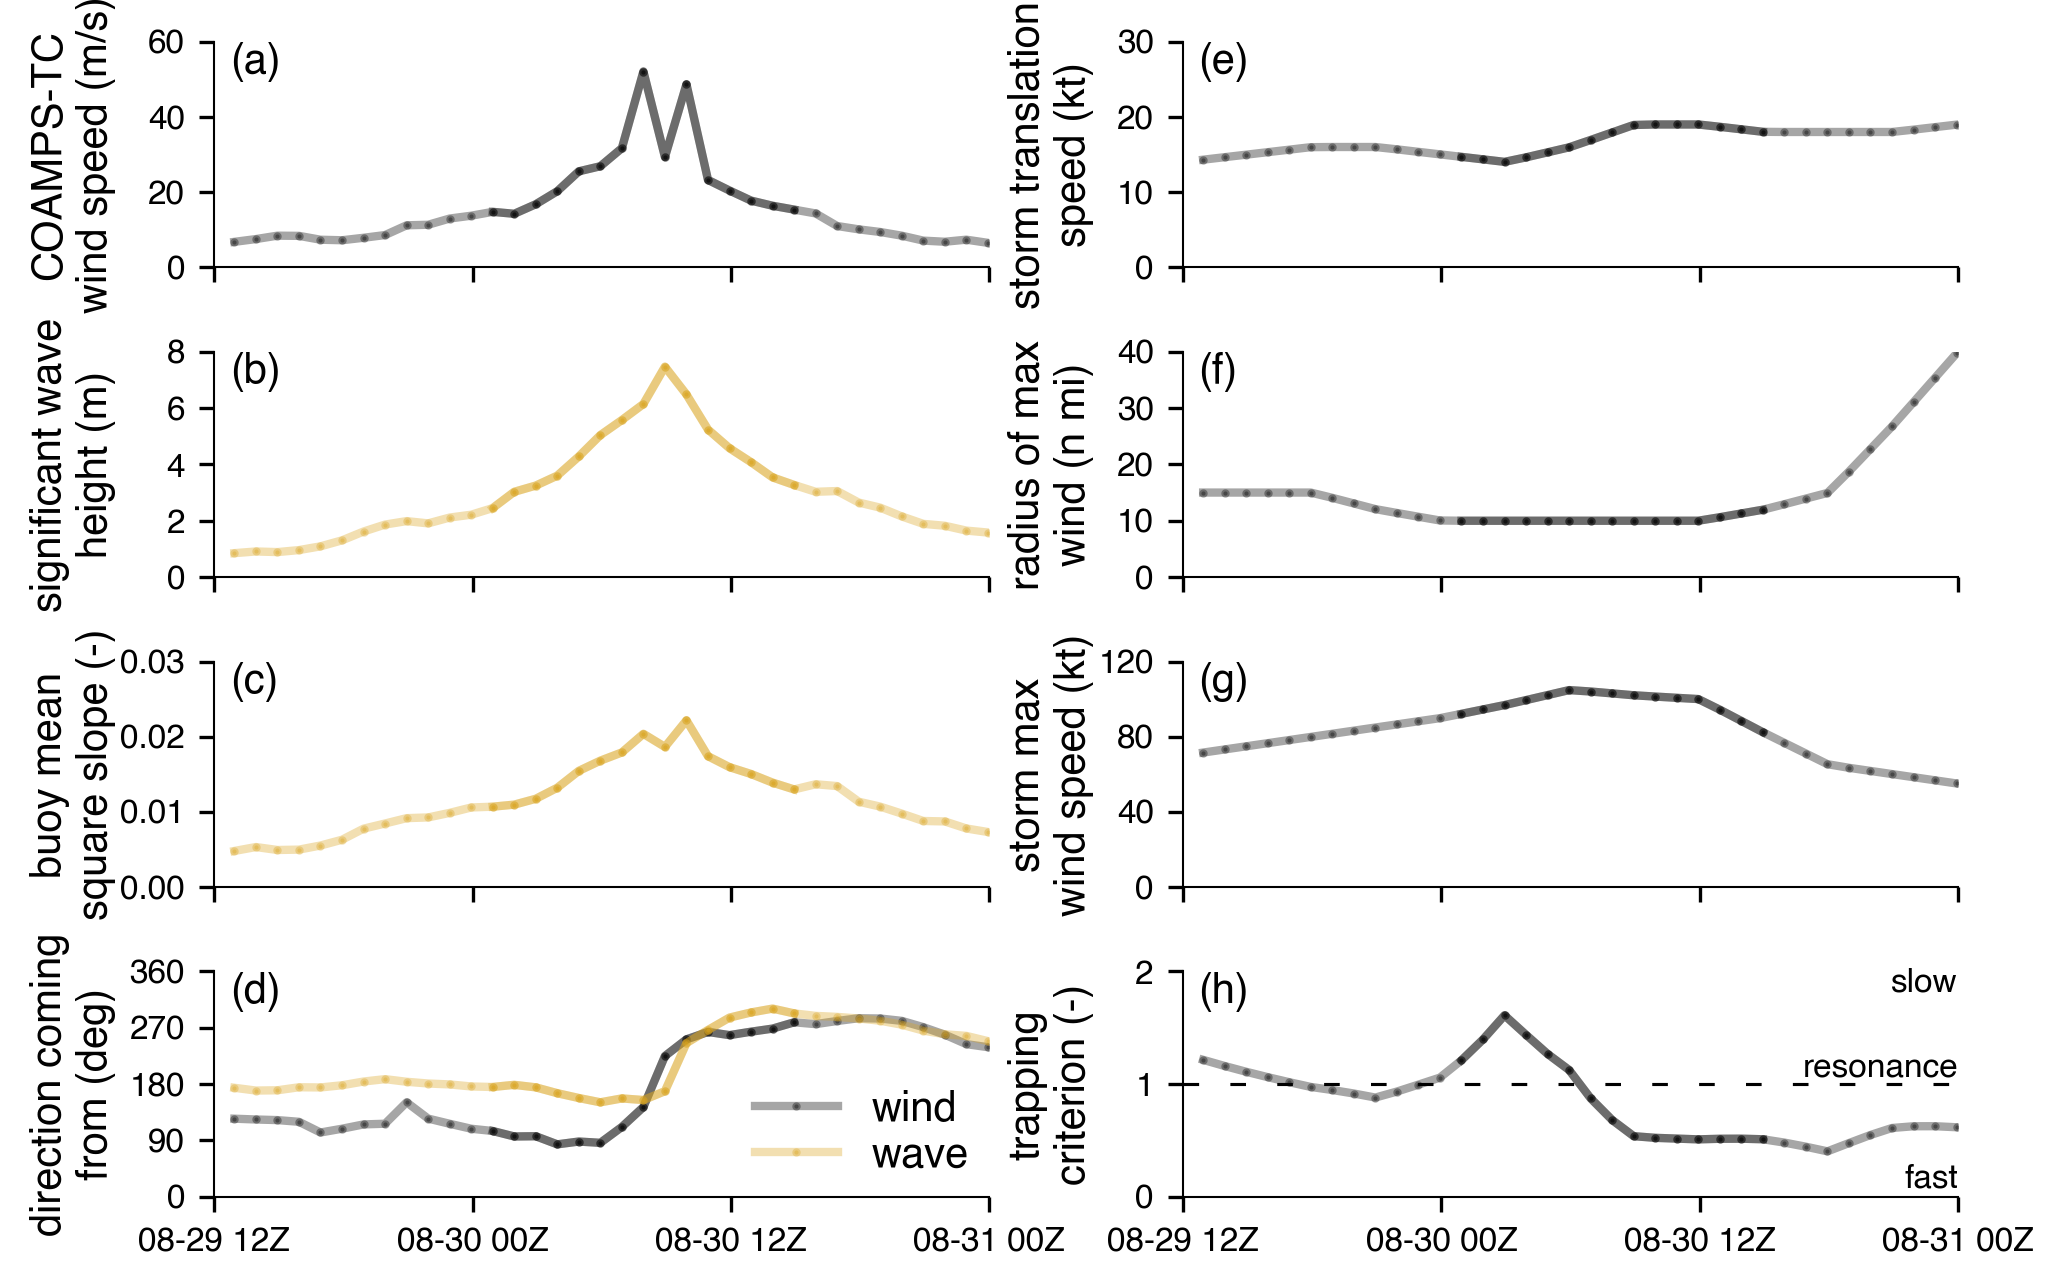

In [27]:
FIG_SIZE = (7.5, 5)
FIG_TITLE = f"fig-time_series"

start_date = pd.Timestamp('2023-08-29T12:00', tz='utc')
end_date = pd.Timestamp('2023-08-31T00:00', tz='utc')
time_slice_full = slice(start_date, end_date)

spotter_id = 'SPOT-30103D'
spotter_subset_df = spotter_df.loc[spotter_id] #, time_slice, :].squeeze()

fig, axes = plt.subplots(4, 2, figsize=FIG_SIZE, sharex=True)# , constrained_layout=True)
fig.subplots_adjust(wspace=0.250, hspace=3/8)
labeler = plotting.SubplotLabeler()
axes_iter = plotting.axes_to_iterator(axes[:, 0])

time_series_kwargs = dict(
    drifter_df=spotter_subset_df.loc[time_slice_full, :],
    time_slice=time_slice,
)
label_kwargs = dict(loc='upper left', nudge_x=-0.03, nudge_y=0.05)

ax = next(axes_iter)
nb3_overview.plot_coamps_wind_speed_time_series(ax=ax, **time_series_kwargs)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
nb3_overview.plot_significant_height_time_series(ax=ax, **time_series_kwargs)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
nb3_overview.plot_mean_square_slope_time_series(ax=ax, **time_series_kwargs)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
nb3_overview.plot_wind_wave_direction_time_series(ax=ax, **time_series_kwargs)
labeler.add_label(ax, **label_kwargs)

axes_iter = plotting.axes_to_iterator(axes[:, 1])
ax = next(axes_iter)
nb3_overview.plot_storm_speed_time_series(ax=ax, **time_series_kwargs)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
nb3_overview.plot_storm_radius_max_wind_time_series(ax=ax, **time_series_kwargs)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
nb3_overview.plot_storm_max_wind_time_series(ax=ax, **time_series_kwargs)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
nb3_overview.plot_trapping_criterion_time_series(ax=ax, **time_series_kwargs)
labeler.add_label(ax, **label_kwargs)

plotting.set_time_series_xaxis(ax, start_date, end_date)
fig.align_ylabels()

# fig.savefig(FIG_TITLE + '.png', bbox_inches='tight')

**Figure 2**:
Time series of a representative buoy (SPOT-30103D, dotted in the overview map) and Idalia's meteorological metrics over a 36-hour period: (a) COAMPS-TC wind speed; (b) buoy-measured significant wave height; (c) buoy-measured mean square slope; (d) buoy-measured energy-weighted wave direction and COAMPS-TC wind direction (at the buoy's position); (e-g) storm translation speed, radius of maximum wind, and maximum wind speed (all as reported by IBTrACS); and (h) Kudryavtsev (2021) trapping criterion (ratio of dimensionless radius of maximum wind to critical fetch, their Equation 16).  Idalia made landfall close to 12Z on 30 August.
Wave heights peak as the storm passes closest to buoy.
The bold regions correspond to the time period shown in the storm-following reference frame.

## Doppler adjustment

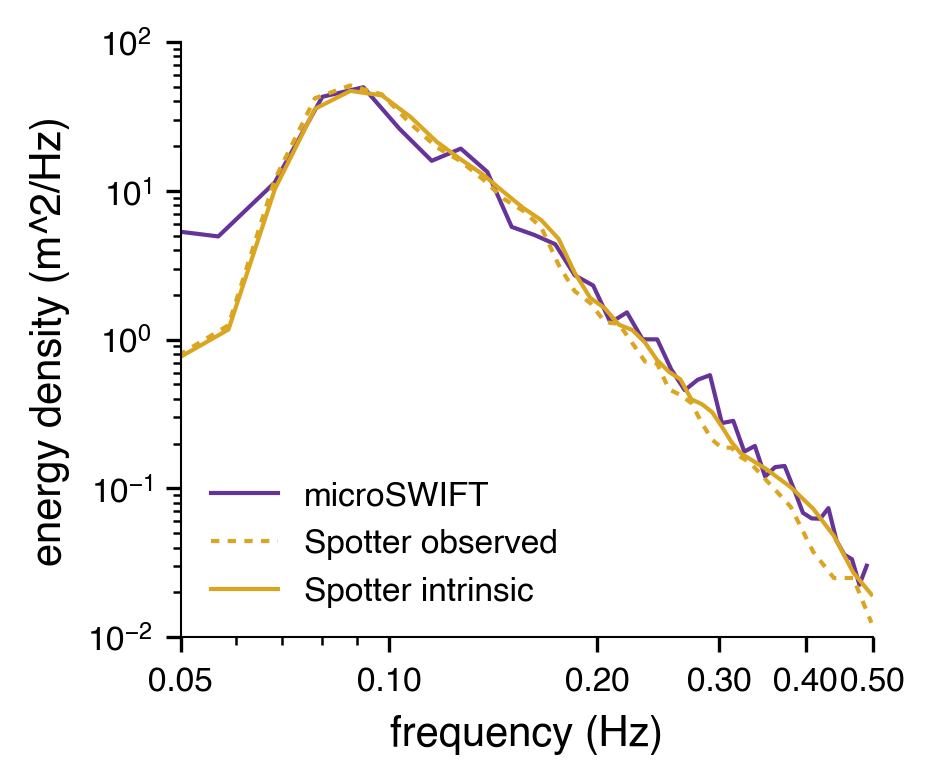

In [28]:
FIG_TITLE = (f"fig-doppler_adjustment")
FIG_SIZE = (3, 2.5)

fig, ax = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=FIG_SIZE,
    constrained_layout=True,
)

start_time = pd.Timestamp('2023-08-30 06:00:00+00:00')
end_time = start_time + pd.Timedelta('1h')
spotter_id= 'SPOT-30101D'
microswift_id = '048'

spotter_subset_df = spotter_df.loc[(spotter_id, slice(start_time, end_time)), :].squeeze()
microswift_subset_df = microswift_df.loc[(microswift_id, slice(start_time, end_time)), :].squeeze()

nb2_doppler_shift_adjustment.plot_doppler_adjusted_spotter_spectrum(
    ax,
    spotter_subset_df,
    microswift_subset_df,
)

# fig.savefig(FIG_TITLE + '.png', bbox_inches='tight')

**Figure 3**:
Comparison of intrinsic (Doppler shift adjusted) and observed scalar energy spectra.
After the Doppler adjustment, Spotter mss calculated from the spectra shown here increased by 20\%, from 0.0150 (observed) to 0.0180 (intrinsic).
The spectrum reported by a nearby (33 km away) microSWIFT is shown for comparison (mss = 0.0184).
At this time instance, the percent difference between the Spotter and microSWIFT slopes reduced from 20.4\% (observed) to 2.2\% (intrinsic).
The 10-m wind speed at this observation is 33 m/s such that the wind-induced drift speed is 0.4 m/s.

## Storm frame wind speed, mean square slope, and alignment

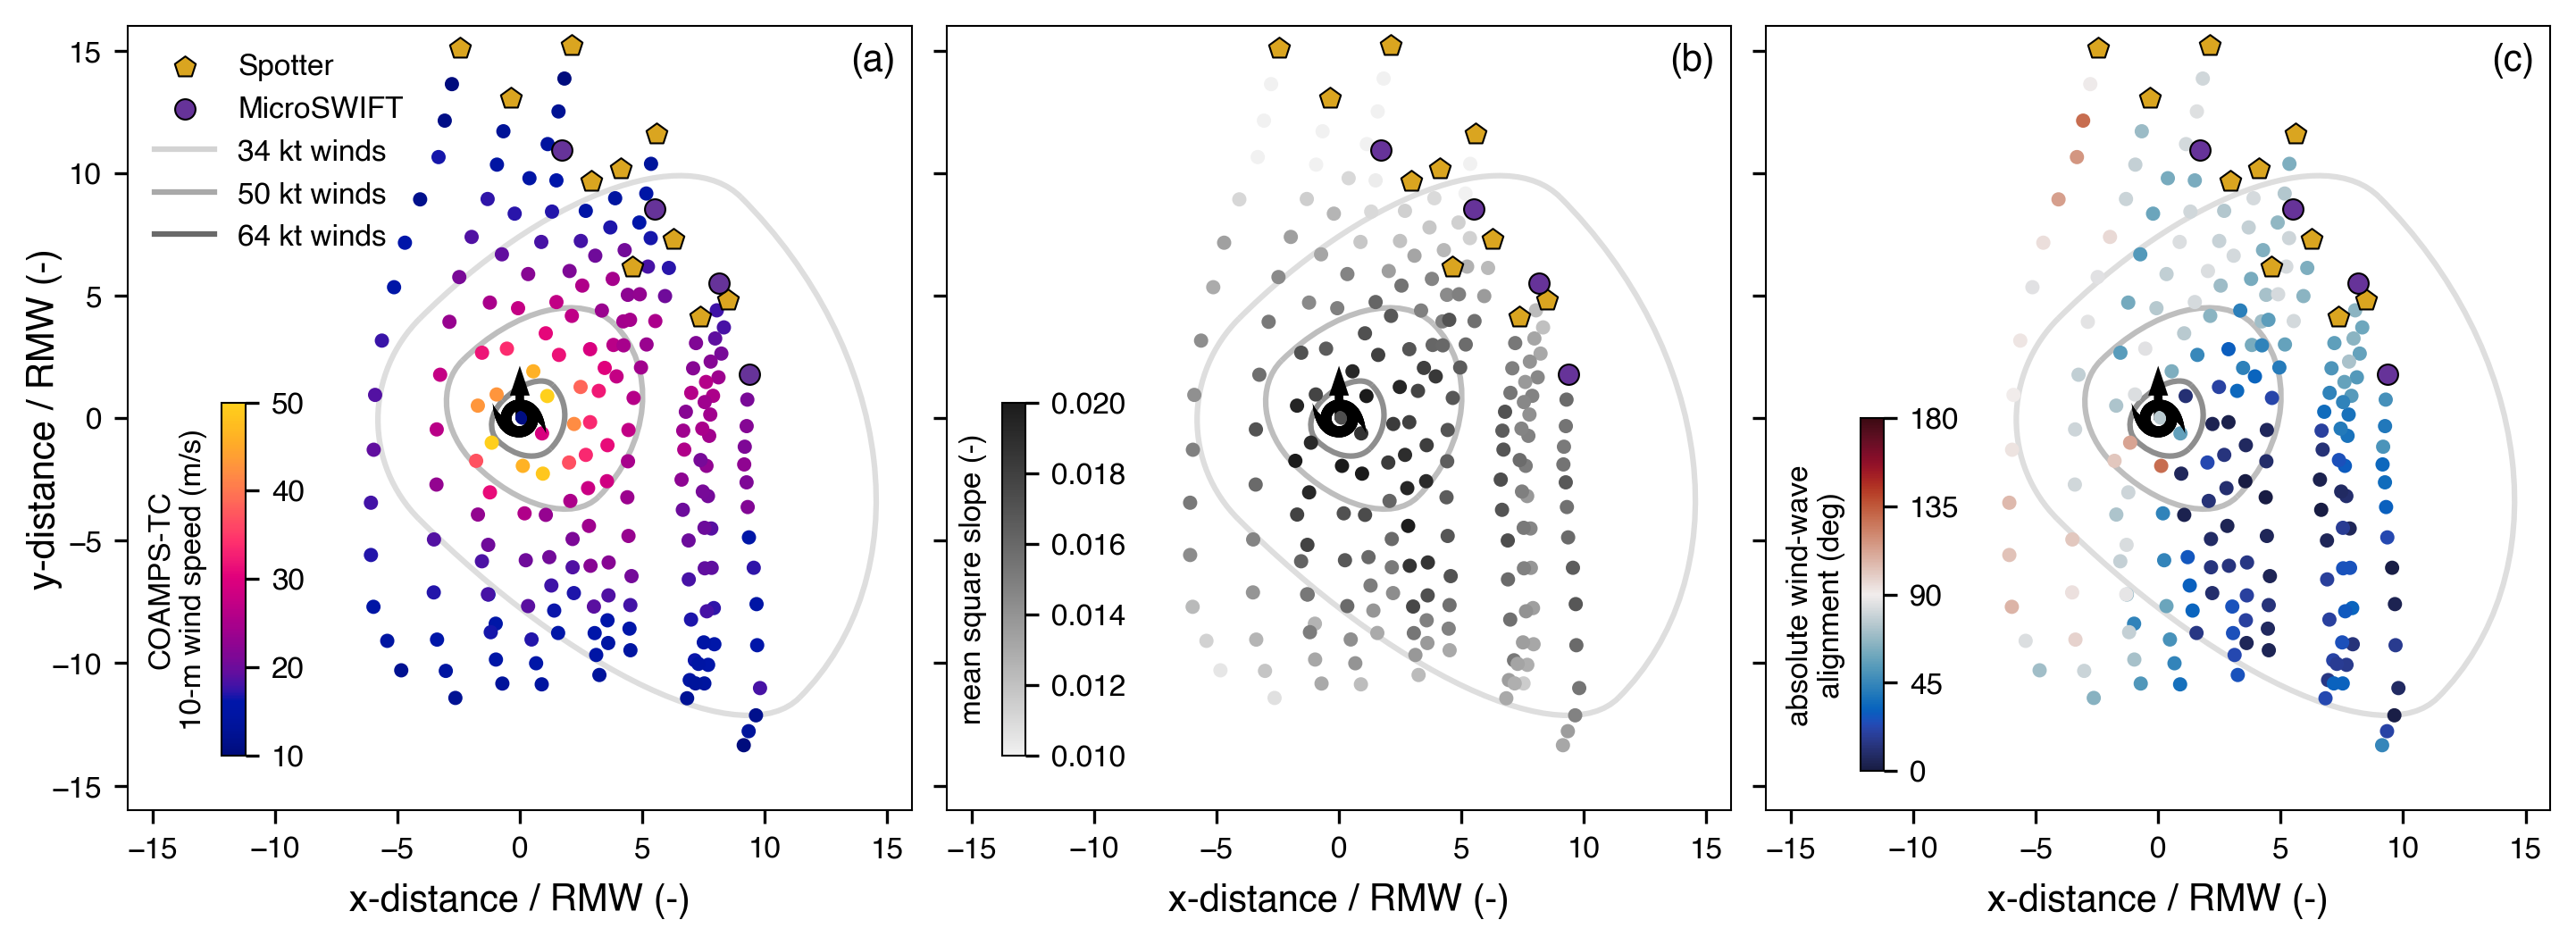

In [29]:
FIG_TITLE = (f"fig-storm_frame_wind_speed_mss_alignment")
FIG_SIZE = (9.5, 3.5)

plot_kwargs = dict(
    spotter_df=spotter_df.xs(time_slice, level='time'),
    microswift_df=microswift_df.xs(time_slice, level='time'),
    ibtracs_df=ibtracs_df.loc[time_slice],
    s=8,
)
gs_kwargs = dict(
    width_ratios=[1, 1, 1],
)
label_kwargs = dict(loc='upper right', nudge_x=0.03, nudge_y=0.03)

fig, axes = plt.subplots(
    ncols=3,
    nrows=1,
    figsize=FIG_SIZE,
    constrained_layout=True,
    gridspec_kw=gs_kwargs,
    sharey=True,
)
labeler = plotting.SubplotLabeler()
axes_iter = plotting.axes_to_iterator(axes)

ax = next(axes_iter)
marker_plots, trail_plots, cbar = nb8_slope_spatial.plot_wind_speed_storm_frame(ax, **plot_kwargs)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
marker_plots, trail_plots, cbar = nb8_slope_spatial.plot_mean_square_slope_storm_frame(ax, plot_legend=False, **plot_kwargs)
ax.set_ylabel(None)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
marker_plots, trail_plots, cbar = nb8_slope_spatial.plot_abs_energy_weighted_alignment_storm_frame(ax, plot_legend=False, **plot_kwargs)
ax.set_ylabel(None)
labeler.add_label(ax, **label_kwargs)

# fig.savefig(FIG_TITLE + '.png')

**Figure 4**:
(a) COAMPS-TC 10-m wind speed, (b) mean square slope, and (c) absolute wind-wave alignment in a storm-following reference frame over a 15-hour period in Hurricane Idalia (2023).
The initial position of each buoy is indicated by the markers with subsequent observations each spaced an hour apart.
The storm center (minimum pressure) is at (0, 0), and the storm heading is always in the direction of the y-axis (up).
All distances are normalized by the radius of maximum wind (RMW) at each observation time.
The concentric rings provide a visualization of the spatial structure of the storm and represent the approximate extent of 34 knot (17.5 m/s) tropical storm force, 50 knot (25.7 m/s) storm force, and 64 knot (32.9 m/s) hurricane force winds from the NHC best track.
The rings are drawn by connecting the radii at each wind speed (reported for each quadrant and averaged over the 15 hour period) with arcs.

## Mean square slope and wind-wave alignment categories

/var/folders/5k/tj9m5nbs0rb__4sp5qh876yc0000gn/T/ipykernel_90406/2791679394.py:31: MatplotlibDeprecationWarning: The InsetPosition class was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use Axes.inset_axes instead.
  cbar.ax.set_axes_locator(InsetPosition(ax, [0.05, 0.07, 0.03, 0.4]))


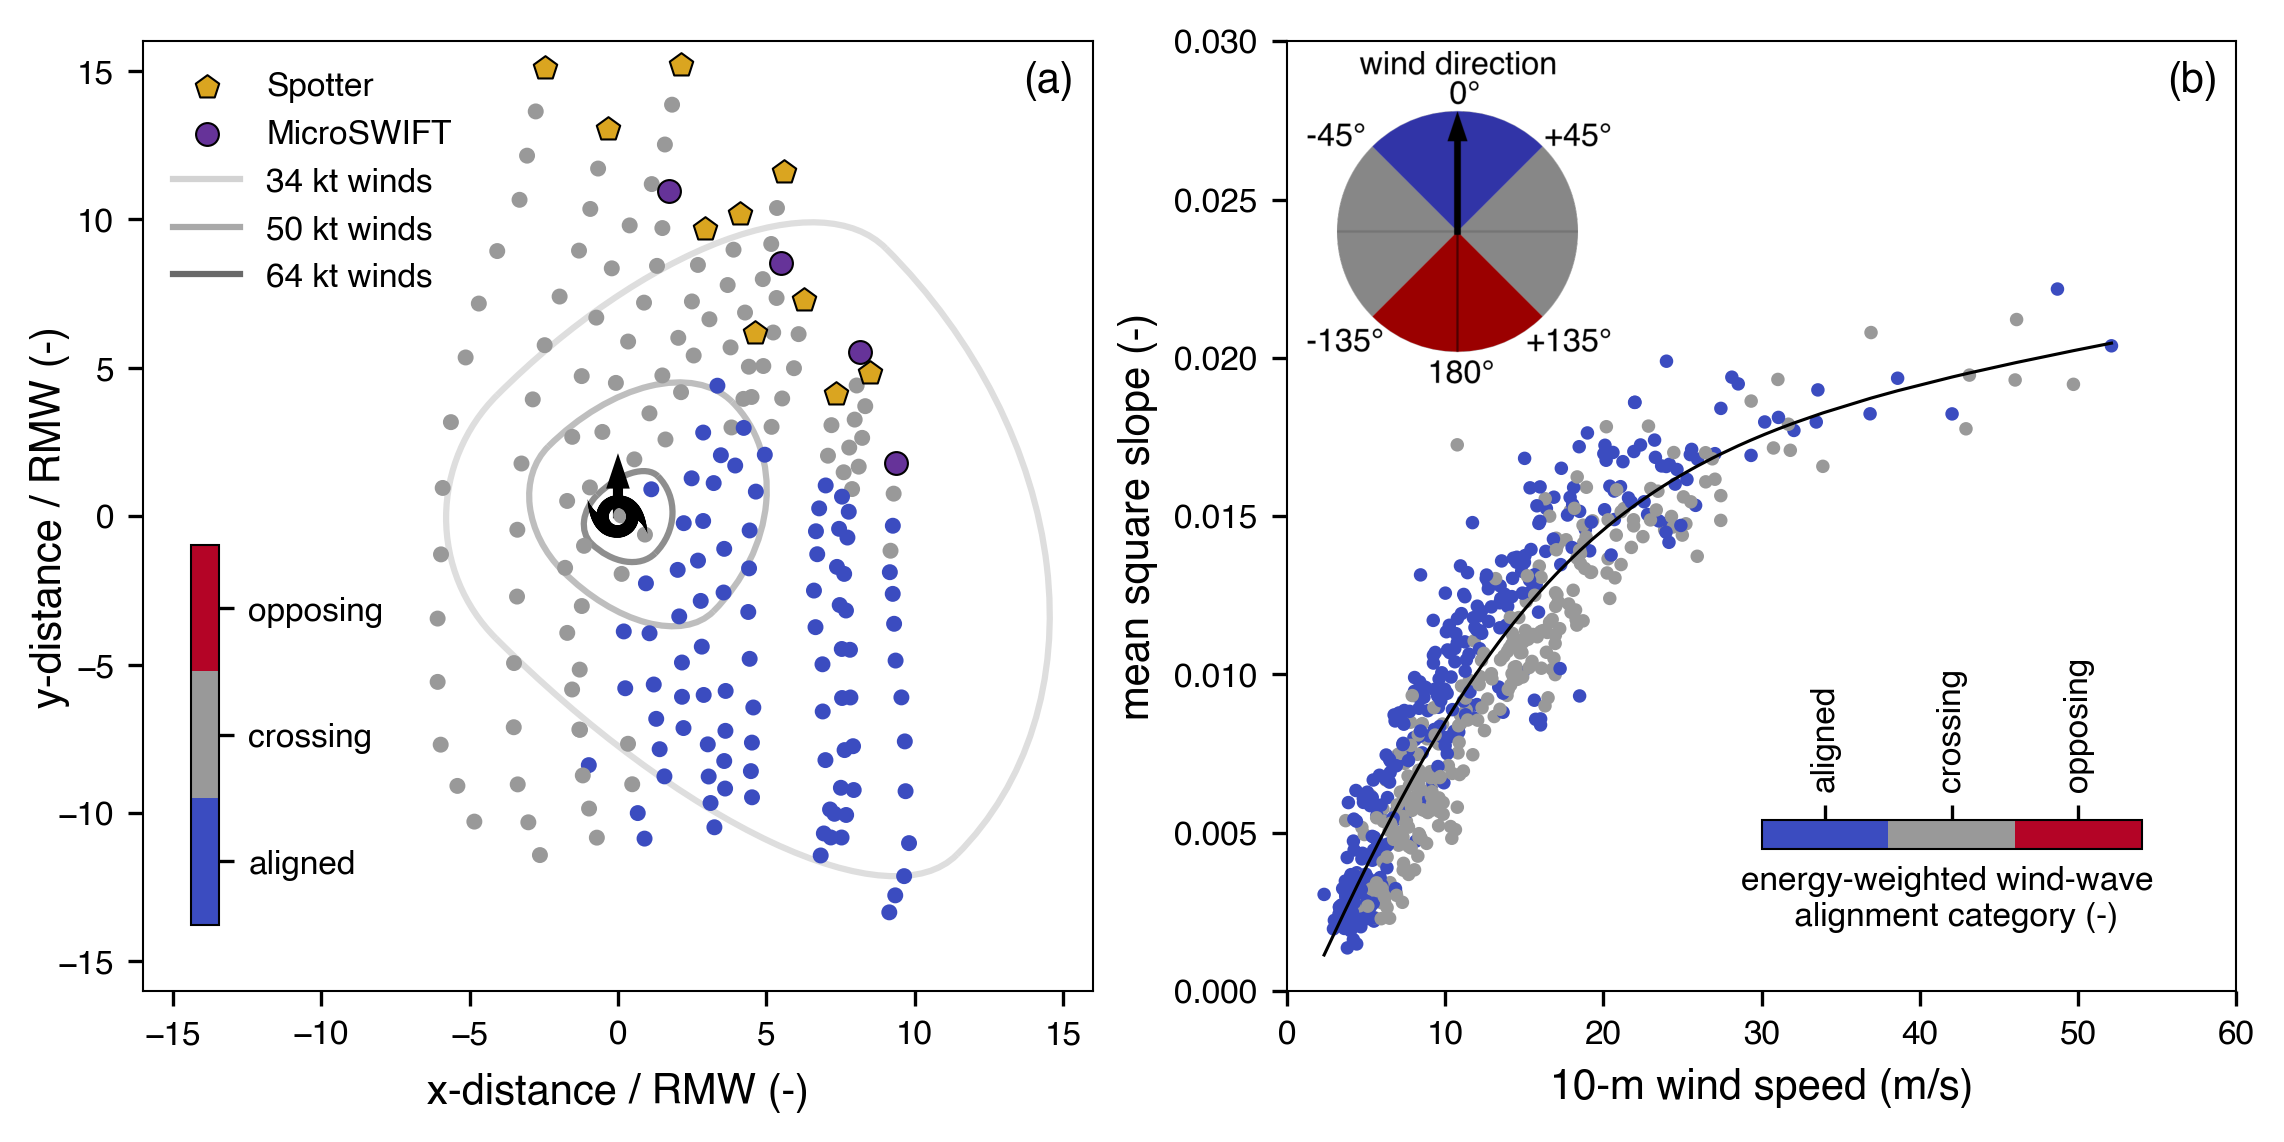

In [30]:
FIG_TITLE = (f"fig-alignment_categories_and_mss")
FIG_SIZE = (7.5, 4)

gs_kwargs = dict(
    width_ratios=[1, 1],
)
label_kwargs = dict(loc='upper right', nudge_x=0.03, nudge_y=0.03)


fig, axes = plt.subplots(
    ncols=2,
    nrows=1,
    figsize=FIG_SIZE,
    constrained_layout=True,
    gridspec_kw=gs_kwargs,
)
labeler = plotting.SubplotLabeler()
axes_iter = plotting.axes_to_iterator(axes)

ax = next(axes_iter)
marker_plots, trail_plots, cbar = nb8_slope_spatial.plot_energy_weighted_alignment_category_storm_frame(
    ax,
    spotter_df=spotter_df.xs(time_slice, level='time'),
    microswift_df=microswift_df.xs(time_slice, level='time'),
    ibtracs_df=ibtracs_df.loc[time_slice],
    s=8,
)
labeler.add_label(ax, **label_kwargs)
cbar.set_label(None)
cbar.ax.set_axes_locator(InsetPosition(ax, [0.05, 0.07, 0.03, 0.4]))

ax = next(axes_iter)
sc, cbar = nb6_slope_secondary_dependence.plot_mean_wind_wave_alignment_cat_fit(
    ax,
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=5,
)

plotting.set_square_aspect(ax)
labeler.add_label(ax, **label_kwargs)

# fig.savefig(FIG_TITLE + '.png') #, bbox_inches='tight')

**Figure 5**:
(a) Wind-wave alignment categories in the storm-following reference frame and (b) buoy mean square slope versus COAMPS-TC 10-m wind speed, classified by wind-wave alignment using an energy-weighted wave direction.
The overall fit is shown in (b).
The legend in the upper left corner of (b) shows the definition of the alignment categories based on the wave direction (azimuth) relative to the wind direction (black arrow at 0 degrees).

## Mean square slope versus wind-wave alignment

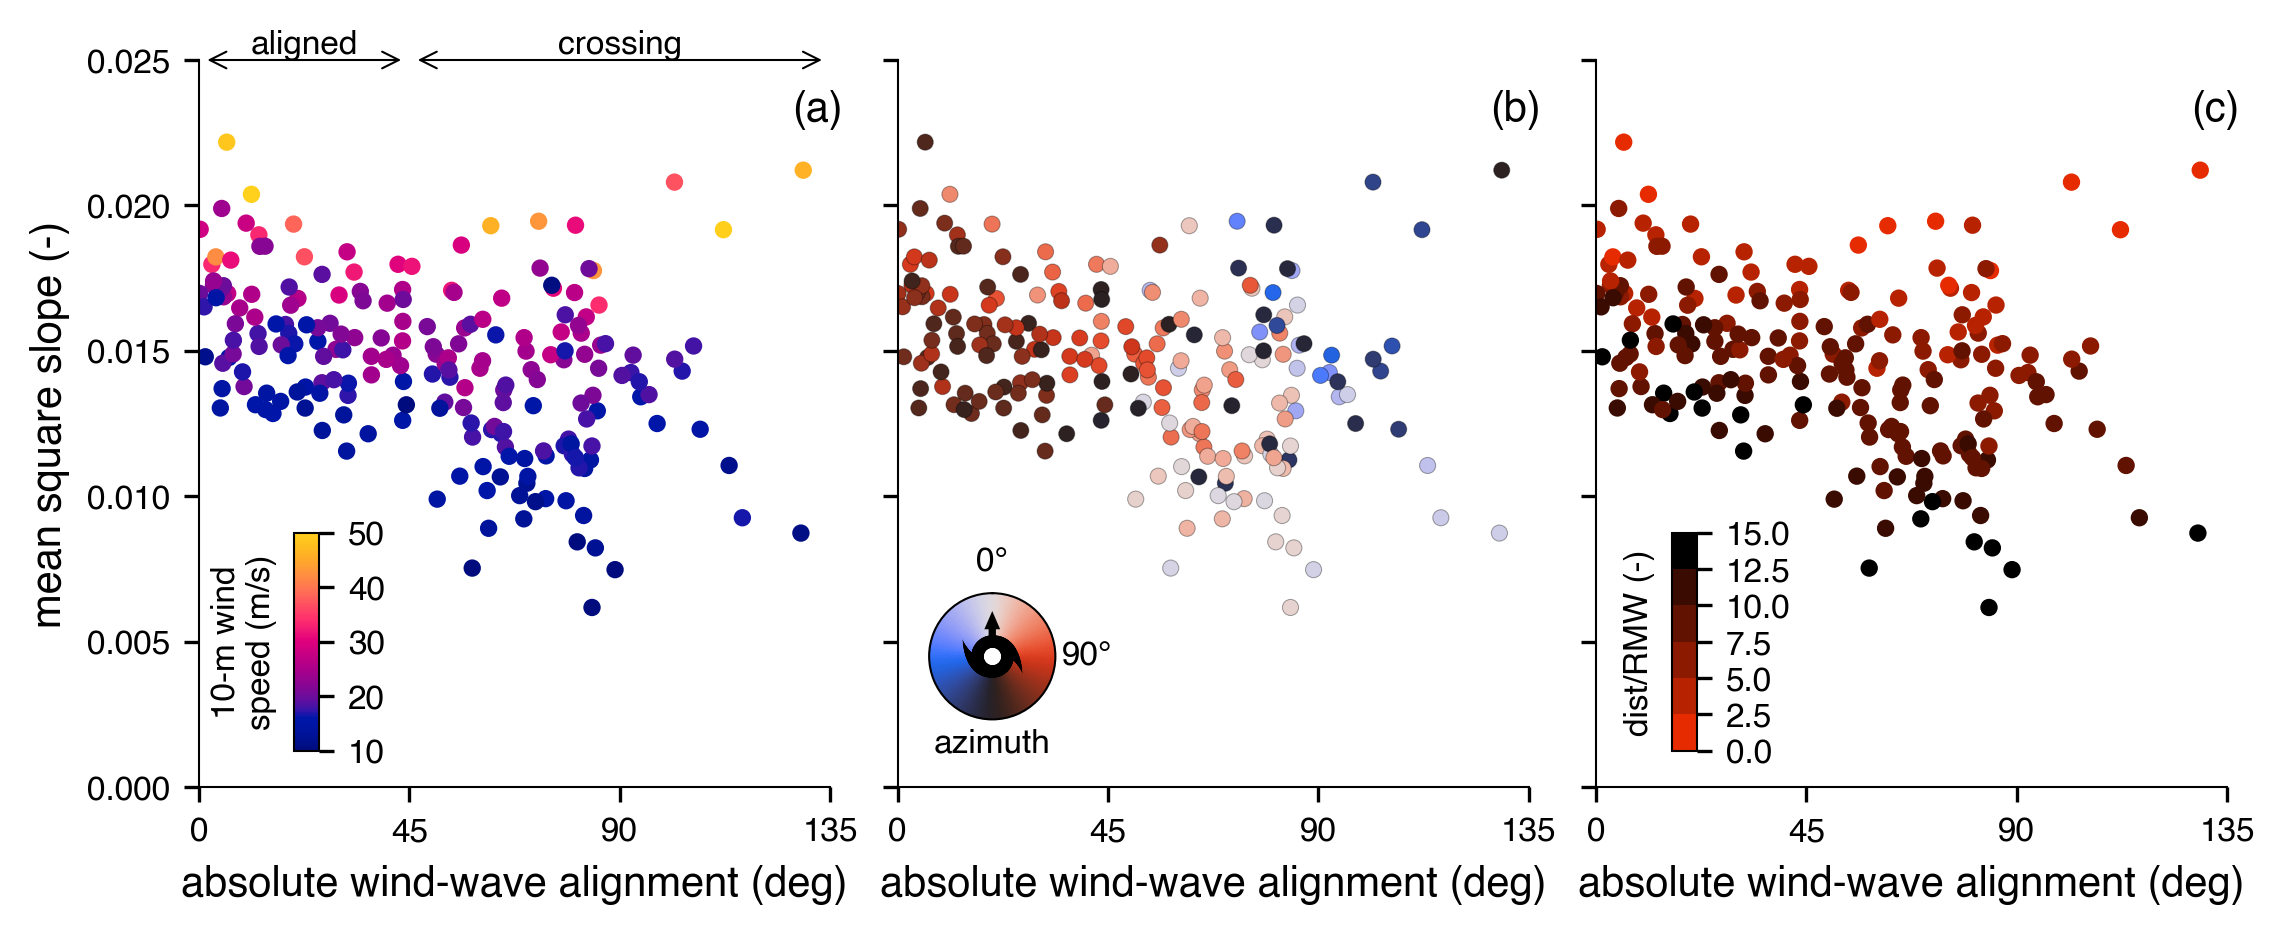

In [34]:
FIG_TITLE = (f"fig-mss_versus_alignment")
FIG_SIZE = (7.5, 3)

gs_kwargs = dict(
    width_ratios=[1, 1, 1],
)
label_kwargs = dict(loc='upper right', nudge_x=0.07, nudge_y=0.01)

fig, axes = plt.subplots(
    ncols=3,
    nrows=1,
    figsize=FIG_SIZE,
    constrained_layout=True,
    gridspec_kw=gs_kwargs,
    sharey=True,
)
labeler = plotting.SubplotLabeler()
axes_iter = plotting.axes_to_iterator(axes)

ax = next(axes_iter)
nb7_slope_alignment.plot_mss_versus_alignment_wind_speed(
    ax,
    spotter_df=spotter_df.xs(time_slice, level='time'),
    microswift_df=microswift_df.xs(time_slice, level='time'),
)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
nb7_slope_alignment.plot_mss_versus_alignment_azimuth(
    ax,
    spotter_df=spotter_df.xs(time_slice, level='time'),
    microswift_df=microswift_df.xs(time_slice, level='time'),
    annotate=False,
)
ax.set_ylabel('')
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
nb7_slope_alignment.plot_mss_versus_alignment_distance(
    ax,
    spotter_df=spotter_df.xs(time_slice, level='time'),
    microswift_df=microswift_df.xs(time_slice, level='time'),
    annotate=False,
)
ax.set_ylabel('')
labeler.add_label(ax, **label_kwargs)

# fig.savefig(FIG_TITLE + '.png')

**Figure 6**:
Mean square slope versus absolute wind-wave alignment classified by (a) 10-m wind speed, (b) azimuth, and (c) RMW-normalized distance relative to the center of the hurricane.
The color map used in (b) is cyclic with red points corresponding to observations on the right side of the storm and blue points corresponding to observations on the left side.

## Directional slope spectra

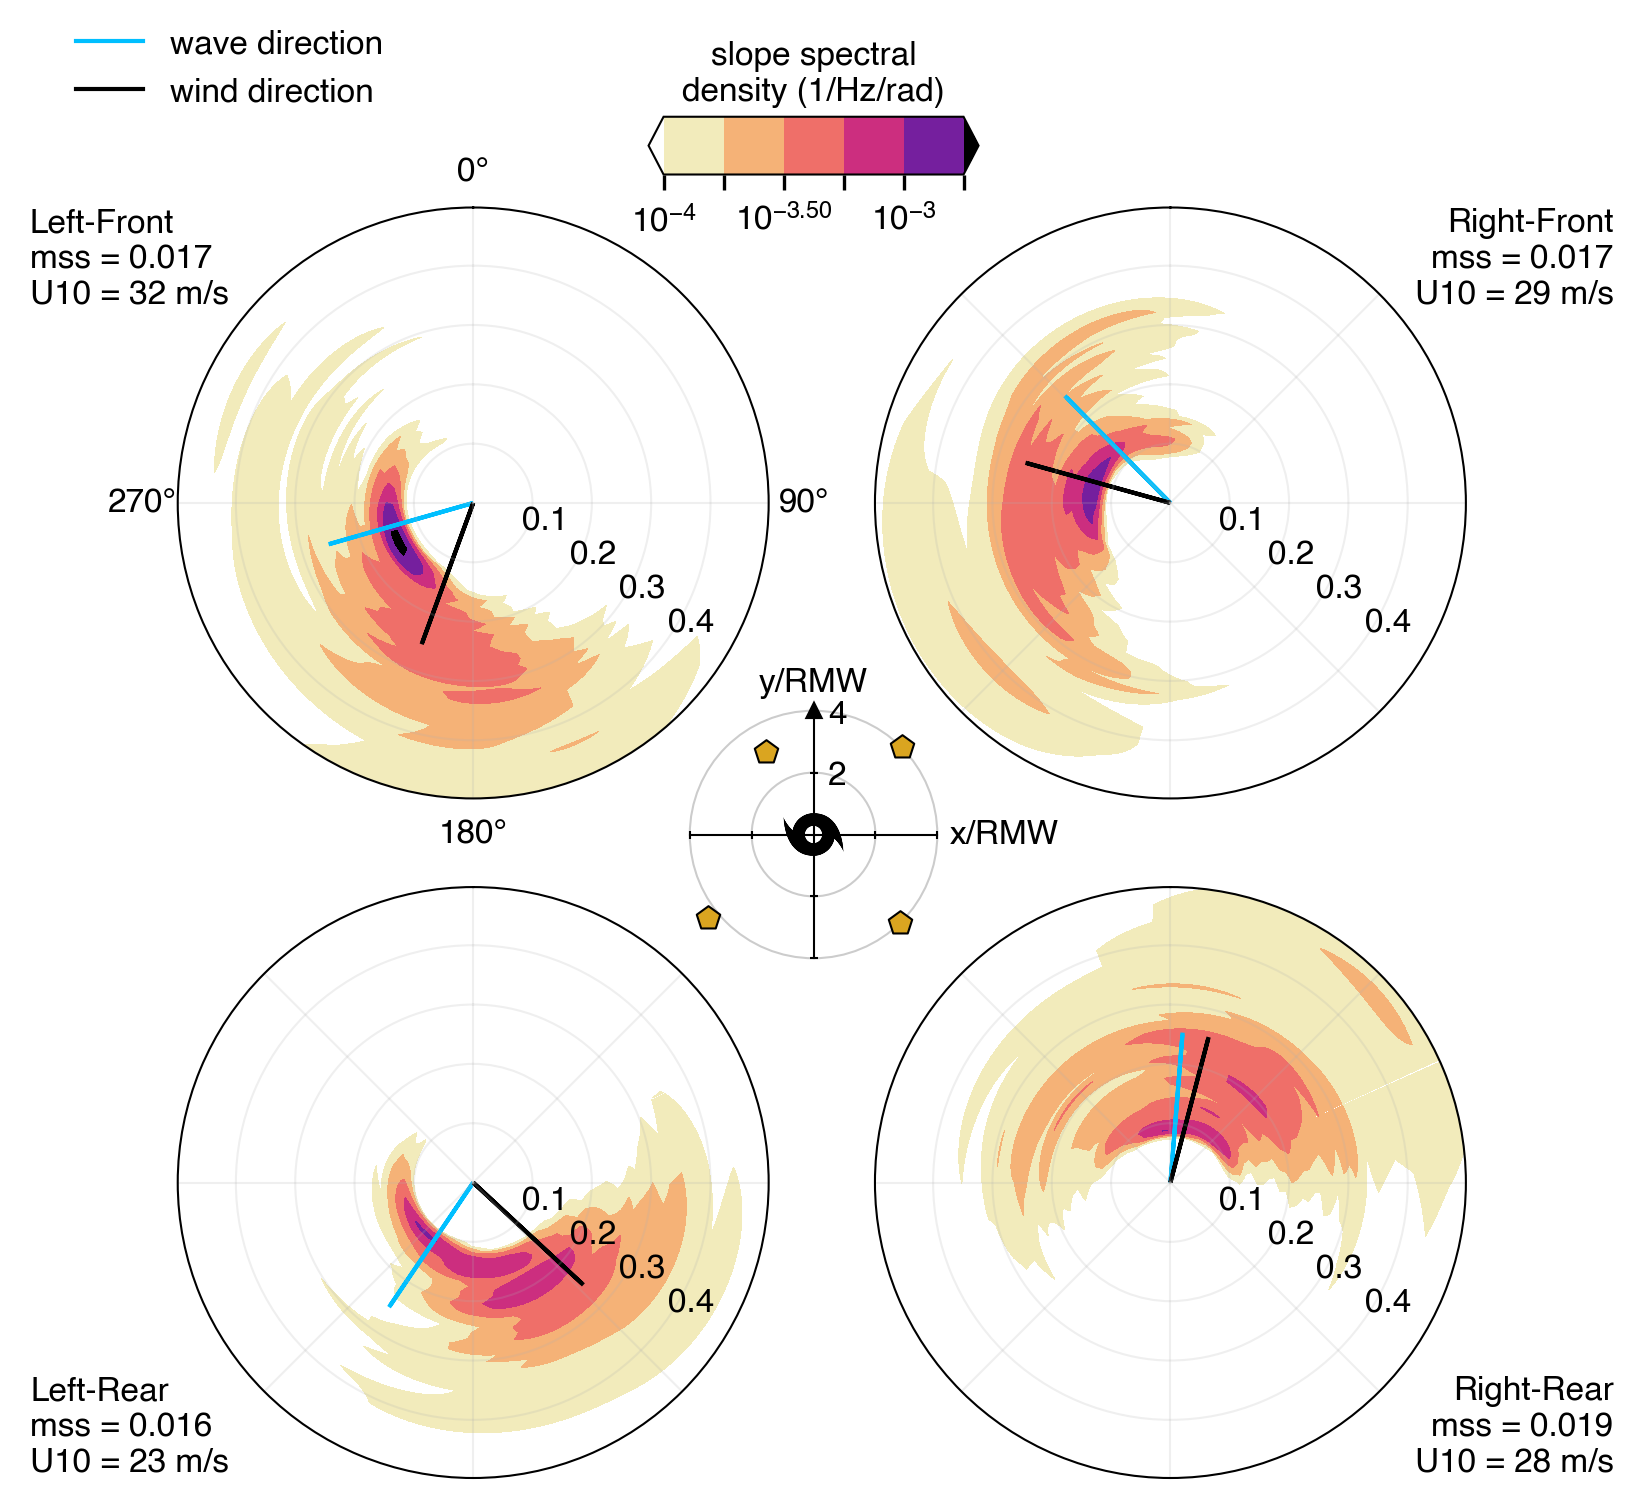

In [31]:
FIG_TITLE = 'fig-directional_slope_spectra_storm_frame'
FIG_SIZE = (5.5, 5.5)

map_kwargs = plotting.spotter_map_kwargs
cbar_kwargs = {'orientation': 'horizontal'}
gridspec_kw = {
    'height_ratios': [1, 1],
    'hspace': 0.15,
    'wspace': 0.15,
    'left': 0.11,
}

fig, ax = plt.subplots(2, 2, subplot_kw=dict(projection='polar'), gridspec_kw=gridspec_kw, figsize=FIG_SIZE)
cax = fig.add_axes([0.4, 0.90, 0.2, 0.035])  # left, bottom, width, height

# Create axes for a storm-centered map in the center
ax_map = fig.add_axes([0.425, 0.425, 0.15, 0.15])
ax_map = nb4_spectra.create_storm_center_map(ax_map)

# Front left quadrant
spotter_id = 'SPOT-30095D'
time_slice_quadrant = utilities.create_time_slice(pd.Timestamp('2023-08-30 08:00:00', tz='utc'))
time_slice_no_tz_quadrant = utilities.strip_time_slice_tz(time_slice_quadrant)
nb4_spectra.plot_2d_slope_spectrum(
    ax[0,0],
    spotter_spectra_2d.sel(id=spotter_id, time=time_slice_no_tz_quadrant),
    storm_frame=True,
    plot_colorbar=True,
    cbar_kwargs=cbar_kwargs,
    cax=cax,
    include_azimuth_ticks=True,
    label_radials=False,
)
nb4_spectra.annotate_spectrum_by_quadrant(ax[0,0], spotter_df.loc[(spotter_id, time_slice_quadrant), :], quadrant='front_left', include_variable_name=True)
plotting.plot_drifter_storm_frame(spotter_df.loc[(spotter_id, time_slice_quadrant), :], ax_map, **map_kwargs)

# Front right quadrant
spotter_id = 'SPOT-30102D'
time_slice_quadrant = utilities.create_time_slice(pd.Timestamp('2023-08-30 07:00:00', tz='utc'))
time_slice_no_tz_quadrant = utilities.strip_time_slice_tz(time_slice_quadrant)
nb4_spectra.plot_2d_slope_spectrum(
    ax[0,1],
    spotter_spectra_2d.sel(id=spotter_id, time=time_slice_no_tz_quadrant),
    storm_frame=True,
    plot_colorbar=False,
    include_azimuth_ticks=False,
    label_radials=False,
)
nb4_spectra.annotate_spectrum_by_quadrant(ax[0,1], spotter_df.loc[(spotter_id, time_slice_quadrant), :], quadrant='front_right', include_variable_name=True)
plotting.plot_drifter_storm_frame(spotter_df.loc[(spotter_id, time_slice_quadrant), :], ax_map, **map_kwargs)


# Rear left quadrant
spotter_id = 'SPOT-30164D'
time_slice_quadrant = utilities.create_time_slice(pd.Timestamp('2023-08-30 09:00:00', tz='utc'))
time_slice_no_tz_quadrant = utilities.strip_time_slice_tz(time_slice_quadrant)
nb4_spectra.plot_2d_slope_spectrum(
    ax[1,0],
    spotter_spectra_2d.sel(id=spotter_id, time=time_slice_no_tz_quadrant),
    storm_frame=True,
    plot_colorbar=False,
    include_azimuth_ticks=False,
    label_radials=False,
)
nb4_spectra.annotate_spectrum_by_quadrant(ax[1,0], spotter_df.loc[(spotter_id, time_slice_quadrant), :], quadrant='rear_left', include_variable_name=True)
plotting.plot_drifter_storm_frame(spotter_df.loc[(spotter_id, time_slice_quadrant), :], ax_map, **map_kwargs)

# Rear right quadrant
spotter_id = 'SPOT-30101D'
time_slice_quadrant = utilities.create_time_slice(pd.Timestamp('2023-08-30 08:00:00', tz='utc'))
time_slice_no_tz_quadrant = utilities.strip_time_slice_tz(time_slice_quadrant)
nb4_spectra.plot_2d_slope_spectrum(
    ax[1,1],
    spotter_spectra_2d.sel(id=spotter_id, time=time_slice_no_tz_quadrant),
    storm_frame=True,
    plot_colorbar=False,
    include_azimuth_ticks=False,
    label_radials=False,
)
nb4_spectra.annotate_spectrum_by_quadrant(ax[1,1], spotter_df.loc[(spotter_id, time_slice_quadrant), :], quadrant='rear_right', include_variable_name=True)
plotting.plot_drifter_storm_frame(spotter_df.loc[(spotter_id, time_slice_quadrant), :], ax_map, **map_kwargs)

# Update spectrum colorbar
cax.xaxis.set_ticks_position('bottom')
cax.xaxis.set_label_position('top')
for label in cax.get_xticklabels()[1::2]: #[1::2]:
            label.set_visible(False)

# Custom legend for wind and wave directions
custom_lines = [
    mpl.lines.Line2D([0], [0], color='deepskyblue', lw=1, label='wave direction'),
    mpl.lines.Line2D([0], [0], color='k', lw=1, label='wind direction')
]
ax[0,0].legend(handles=custom_lines, frameon=False, bbox_to_anchor=[-0.2, 1.33], loc='upper left', borderpad=0)

# fig.savefig(FIG_TITLE + '.png', bbox_inches='tight')

**Figure 7**:
Example directional slope spectra, $S(f, \varphi)$, in each of the four quadrants.
In each plot, the azimuth indicates the direction of the energy and frequency increases radially outward.
All directions are in the ``going to'' convention and 0 degrees is aligned with the hurricane's heading.
The center panel shows the position (in RMW-normalized coordinates) of each buoy relative to the hurricane's center.

## Down- and cross-wind mean square slope

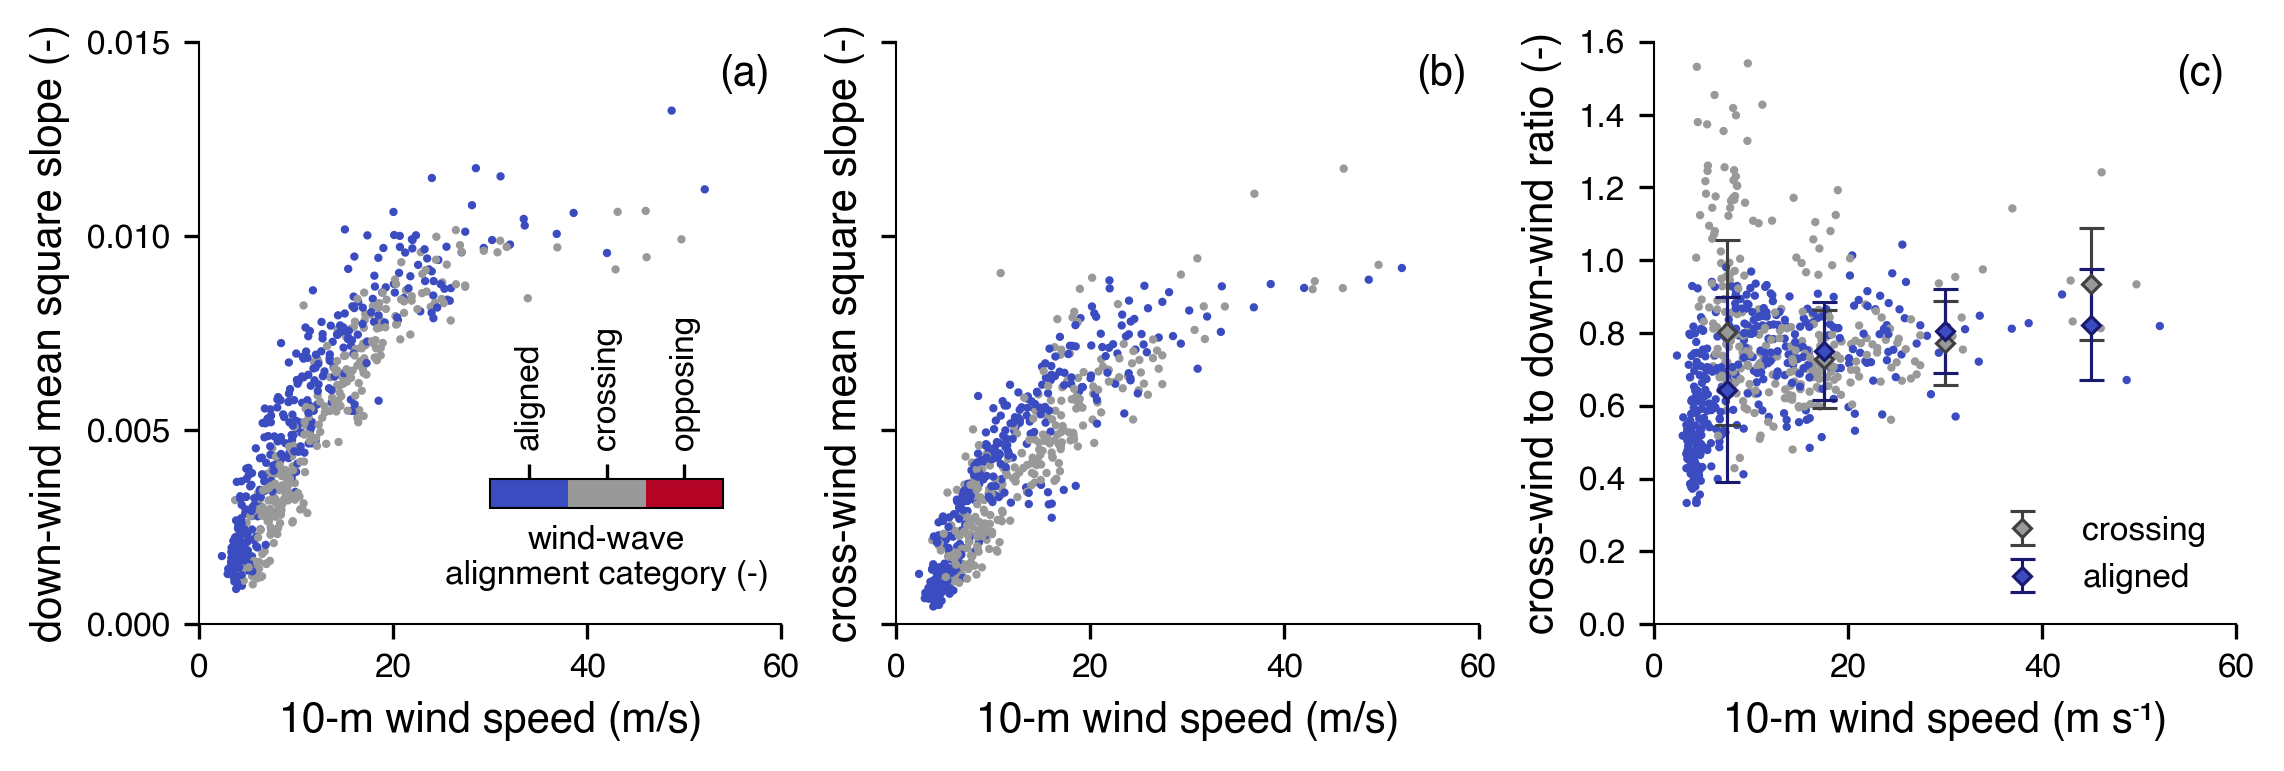

In [7]:
FIG_TITLE = (f"fig-mss_components_by_alignment_category")
FIG_SIZE = (7.5, 2.5)


label_kwargs = dict(loc='upper right', nudge_x=0.03, nudge_y=0.03)

fig = plt.figure(layout='constrained', figsize=FIG_SIZE)
ax_down = fig.add_subplot(1, 3, 1)
ax_cross = fig.add_subplot(1, 3, 2, sharex=ax_down, sharey=ax_down)
ax_ratio = fig.add_subplot(1, 3, 3, sharex=ax_down)
labeler = plotting.SubplotLabeler()

nb6_slope_secondary_dependence.plot_mean_wind_wave_alignment_cat_mss_components(
    ax_down=ax_down,
    ax_cross=ax_cross,
    ax_ratio=ax_ratio,
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    s=1,
)
nb7_slope_alignment.plot_mss_ratio_bins(ax_ratio, crossing_mss_ratio_bins, aligned_mss_ratio_bins)
plotting.set_square_aspect(ax_ratio)

labeler.add_label(ax_down, **label_kwargs)
labeler.add_label(ax_cross, **label_kwargs)
labeler.add_label(ax_ratio, **label_kwargs)
ax_cross.tick_params(labelleft=False)

# fig.savefig(FIG_TITLE + '.png', bbox_inches='tight')

**Figure 8**:
Mean square slope components: (a) Down-wind ($\mathrm{mss_{down}}$), (b) cross-wind ($\mathrm{mss_{cross}}$), and (c) cross-wind to down-wind ratio, all versus 10-m wind speed and classified by wind-wave alignment using an energy-weighted wave direction.

## Sensitivity to Doppler Adjustment

Text(0, 0.5, '')

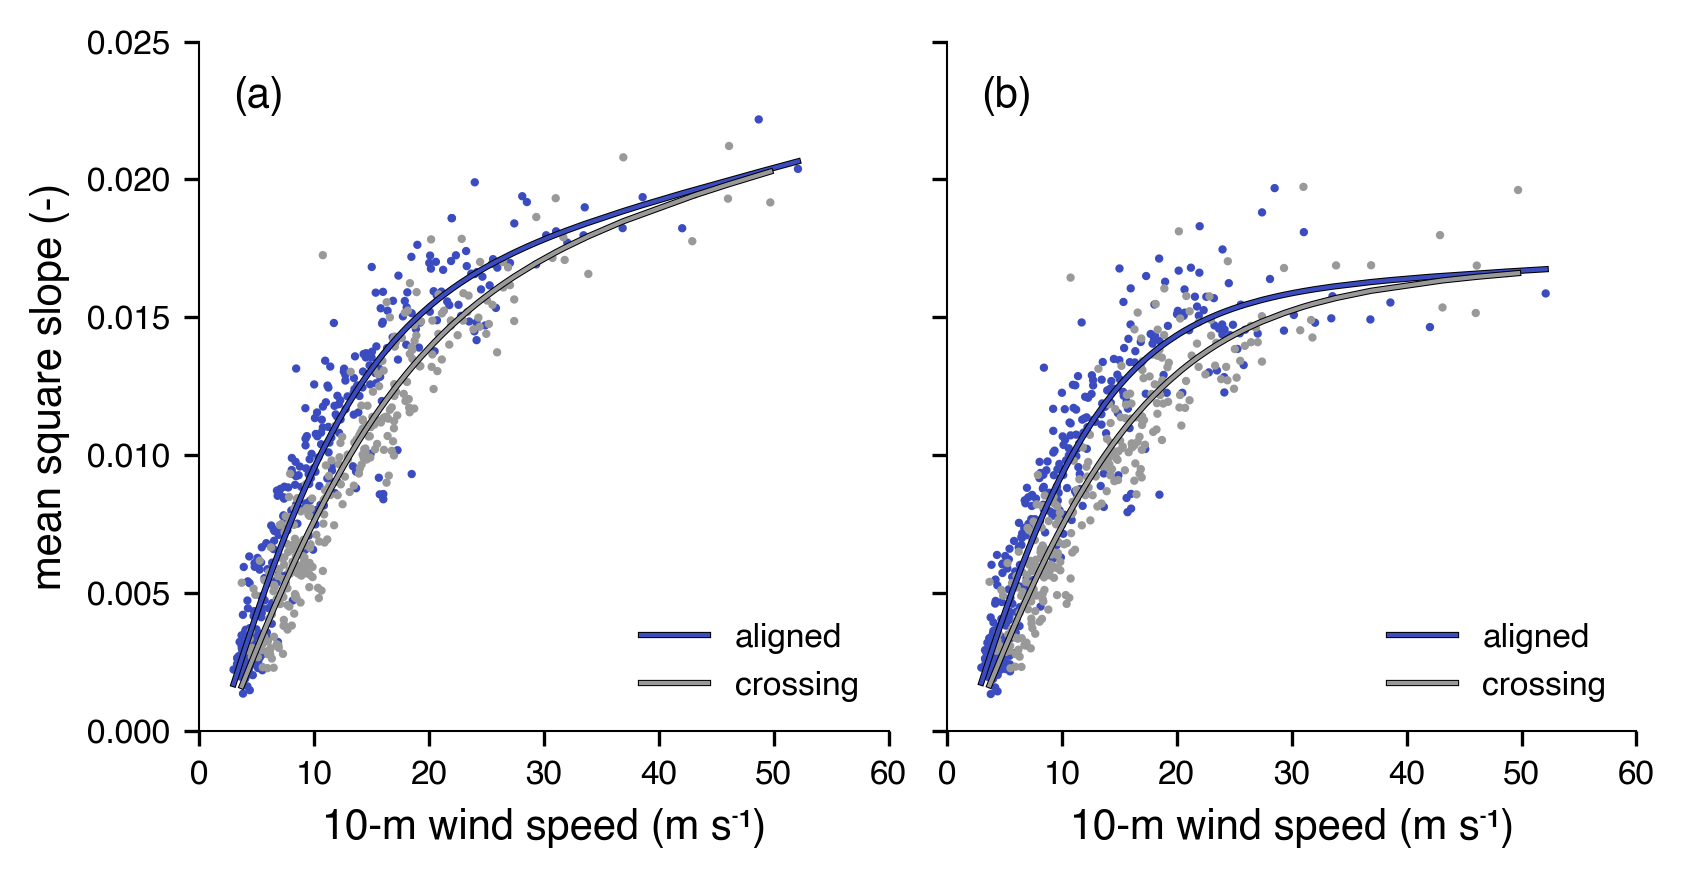

In [8]:
FIG_TITLE = (f"fig-mss_versus_wind_speed_fit_by_alignment")
FIG_SIZE = (plotting.figure_full_width, 3)

gs_kwargs = dict(
    width_ratios=[1, 1],
)
label_kwargs = dict(loc='upper left')  #, nudge_x=-0.03, nudge_y=0.03)

fig, axes = plt.subplots(
    ncols=2,
    nrows=1,
    figsize=FIG_SIZE,
    constrained_layout=True,
    gridspec_kw=gs_kwargs,
    sharey=True,
)
axes_iter = plotting.axes_to_iterator(axes)
labeler = plotting.SubplotLabeler()

ax = next(axes_iter)
nb7_slope_alignment.plot_multivariate_intrinsic_mss_fit(
    ax,
    fit_df=fit_by_category_df,
)
plotting.set_square_aspect(ax)
plotting.remove_top_and_right_spines(ax)
labeler.add_label(ax, **label_kwargs)

ax = next(axes_iter)
nb7_slope_alignment.plot_multivariate_observed_mss_fit(
    ax,
    fit_df=fit_by_category_df,
)
plotting.set_square_aspect(ax)
plotting.remove_top_and_right_spines(ax)
labeler.add_label(ax, **label_kwargs)
ax.set_ylabel('')

# fig.savefig(FIG_TITLE + '.png')

**Figure 9**:
Aligned and crossing fit to mean square slope versus 10-m wind speed for (a) Intrinsic (Doppler-adjusted) mean square slope and (b) observed mean square slope.

## Other secondary dependencies

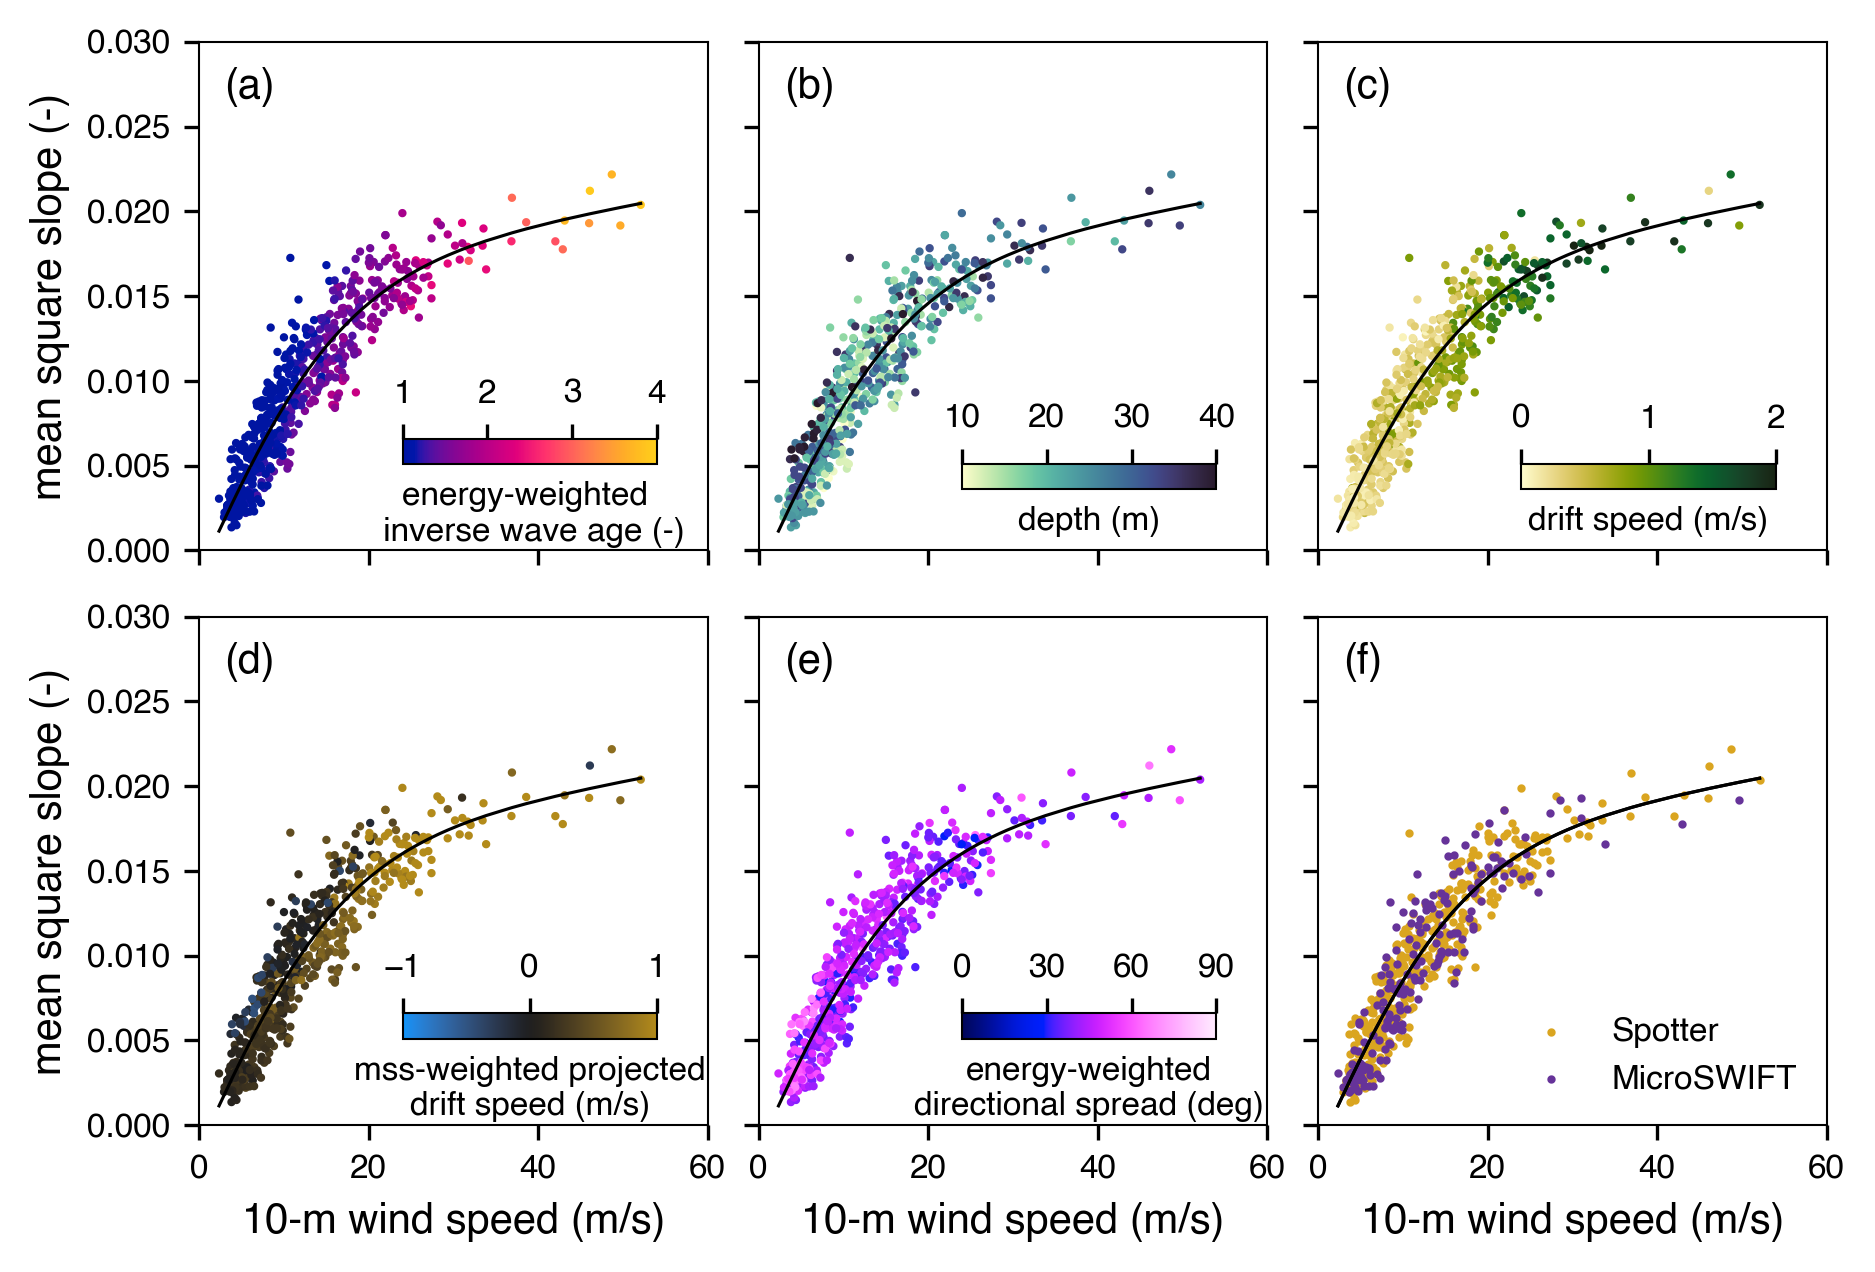

In [12]:
FIG_TITLE = (f"fig-mss_versus_wind_speed_secondary_dependency_grid")
FIG_SIZE = (7, 4.75)

gs_kwargs = dict(
    width_ratios=[1, 1, 1],
    height_ratios=[1, 1],
    wspace=0.1,
    hspace=0.1,
)
plot_kwargs = dict(
    spotter_df=spotter_df,
    microswift_df=microswift_df,
    fit_df=fit_df,
    s=1,
)

fig, axes = plt.subplots(
    ncols=3,
    nrows=2,
    sharey=True,
    sharex=True,
    figsize=FIG_SIZE,
    gridspec_kw=gs_kwargs,
)
labeler = plotting.SubplotLabeler()
axes_iter = plotting.axes_to_iterator(axes)

ax = next(axes_iter)
sc, cbar = nb6_slope_secondary_dependence.plot_mean_inverse_wave_age_fit(ax, **plot_kwargs)
ax.set_xlabel('')
plotting.set_square_aspect(ax)
labeler.add_label(ax)

ax = next(axes_iter)
sc, cbar = nb6_slope_secondary_dependence.plot_depth_fit(ax, **plot_kwargs)
ax.set_xlabel('')
ax.set_ylabel('')
plotting.set_square_aspect(ax)
labeler.add_label(ax)

ax = next(axes_iter)
sc, cbar = nb6_slope_secondary_dependence.plot_drift_speed_fit(ax, **plot_kwargs)
ax.set_xlabel('')
ax.set_ylabel('')
plotting.set_square_aspect(ax)
labeler.add_label(ax)

ax = next(axes_iter)
sc, cbar = nb6_slope_secondary_dependence.plot_projected_drift_speed_fit(ax, **plot_kwargs)
plotting.set_square_aspect(ax)
labeler.add_label(ax)

ax = next(axes_iter)
sc, cbar = nb6_slope_secondary_dependence.plot_energy_weighted_spread_fit(ax, **plot_kwargs)
ax.set_ylabel('')
plotting.set_square_aspect(ax)
labeler.add_label(ax)

ax = next(axes_iter)
sc, cbar = nb6_slope_secondary_dependence.plot_buoy_type_fit(ax, **plot_kwargs)
ax.set_ylabel('')
plotting.set_square_aspect(ax)
labeler.add_label(ax)

# fig.savefig(FIG_TITLE + '.png', bbox_inches='tight')

**Figure 10**:
Mean square slope versus 10-m wind speed classified by: (a) inverse wave age calculated using wave phase speed at the energy-weighted period; (b) water depth (positive down) from the General Bathymetric Chart of the Oceans (GEBCO); (c) buoy drift speed; (d) drift speed projected onto mss-weighted wave direction; (e) wave directional spread calculated from energy-weighted directional moments; and (f) buoy type.

## References

Kudryavtsev, V., Yurovskaya, M., & Chapron, B. (2021). Self‐Similarity of Surface Wave Developments Under Tropical Cyclones. Journal of Geophysical Research: Oceans, 126(4), e2020JC016916. https://doi.org/10.1029/2020JC016916